<a href="https://colab.research.google.com/github/smorenorod/Python-Codes/blob/main/Binary_Classification_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#libraries
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
!pip install graphviz

In [ ]:
!pip install pydotplus

In [2]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus

In [3]:
   from google.colab import drive

   drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#uploaded = files.upload()

In [4]:
#data=pd.read_excel('/content/example_dataset.xlsx', index_col=None)
data=pd.read_csv('/content/drive/MyDrive/example_dataset.csv', index_col=None)


#data = pd.read_excel(io.BytesIO(uploaded.get('example_dataset.xlsx')))


In [ ]:
#check for duplicated IDs
data.groupby('cust_id').cust_id.nunique().sort_values(ascending=False)

cust_id
1100          1
630318902     1
630315272     1
630315285     1
630315327     1
             ..
239445573     1
239445739     1
239445860     1
239445892     1
1438966754    1
Name: cust_id, Length: 3591748, dtype: int64

In [5]:
#selected variables to avoid Data Leakage
data_model=data[["cust_id",
"reference_date",
"activation_date",
"conversion",
"use_credit_card",
"use_cash",
"use_debit_card",
"use_voucher",
"use_bank_transfer",
"has_personal_loan_preapproved",
"use_cart",
"antiquity",
"open_rate",
"mobile_track_count",
"days_since_last_mobile_track",
"os",
"made_off_app_trans_30",
"made_no_princ_trans_30"]]



In [ ]:
data_model.shape[0]

3591748

In [ ]:
#nulls per columns
null_columns=data_model.columns[data_model.isnull().any()]
data_model[null_columns].isnull().sum()

activation_date                  3545422
use_credit_card                   871409
use_cash                          871409
use_debit_card                    871409
use_voucher                       871409
use_bank_transfer                 871410
has_personal_loan_preapproved          1
use_cart                         1051212
antiquity                              2
open_rate                         123756
mobile_track_count                218455
days_since_last_mobile_track           1
os                                  1189
made_off_app_trans_30                  1
made_no_princ_trans_30                 1
dtype: int64

In [ ]:
#pct of null per columns
100*data_model[null_columns].isnull().sum()/data_model.shape[0]



activation_date                  98.710210
use_credit_card                  24.261418
use_cash                         24.261418
use_debit_card                   24.261418
use_voucher                      24.261418
use_bank_transfer                24.261446
has_personal_loan_preapproved     0.000028
use_cart                         29.267421
antiquity                         0.000056
open_rate                         3.445565
mobile_track_count                6.082136
days_since_last_mobile_track      0.000028
os                                0.033104
made_off_app_trans_30             0.000028
made_no_princ_trans_30            0.000028
dtype: float64

In [6]:
#keep only not null rows

data_model_beta=data[["cust_id",
"user_category",
"reference_date",
"conversion",
"use_credit_card",
"use_cash",
"use_debit_card",
"use_voucher",
"use_bank_transfer",
"has_personal_loan_preapproved",
"use_cart",
"antiquity",
"open_rate",
"mobile_track_count",
"days_since_last_mobile_track",
"os",
"made_off_app_trans_30",
"made_no_princ_trans_30"]]






data_not_null=data_model_beta[data_model_beta.notnull().all(axis=1)]

In [ ]:
#percentage of rows with not null data
100*data_not_null.shape[0]/data_model.shape[0]

65.8183424895065

In [ ]:
data_not_null

,cust_id,user_category,reference_date,conversion,use_credit_card,use_cash,use_debit_card,use_voucher,use_bank_transfer,has_personal_loan_preapproved,use_cart,antiquity,open_rate,mobile_track_count,days_since_last_mobile_track,os,made_off_app_trans_30,made_no_princ_trans_30
311,1383021541,never_user,2023-08-01,0,yes,no,no,no,no,0.0,no,68.0,0.0,31.0,0.0,android,0.0,0.0
312,745529660,never_user,2023-08-01,0,yes,no,no,no,no,1.0,no,836.0,20.5,31.0,0.0,android,0.0,0.0
313,1363125891,never_user,2023-08-01,0,yes,no,no,no,no,0.0,no,94.0,13.0,22.0,0.0,android,0.0,0.0
314,134254992,never_user,2023-08-01,0,yes,no,no,no,no,1.0,no,3805.0,44.5,50.0,0.0,android,0.0,0.0
316,24267867,never_user,2023-08-01,0,yes,no,no,no,no,1.0,no,4907.0,0.0,12.0,0.0,android,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591742,222627222,churn_user,2023-08-01,0,yes,no,no,no,no,1.0,yes,2563.0,45.0,3.0,17.0,android,1.0,0.0
3591743,469476524,never_user,2023-08-01,0,yes,no,no,no,no,0.0,yes,923.0,0.0,6.0,17.0,android,0.0,0.0
3591744,173996950,never_user,2023-08-01,0,yes,no,no,no,no,1.0,no,3137.0,0.0,37.0,17.0,android,0.0,0.0
3591745,162106346,never_user,2023-08-01,0,yes,no,no,no,no,1.0,no,3312.0,0.0,16.0,17.0,android,0.0,0.0


In [7]:
#X and Y dataset split

X=data_not_null[[
"use_credit_card",
"use_cash",
"use_debit_card",
"use_voucher",
"use_bank_transfer",
"has_personal_loan_preapproved",
"use_cart",
"antiquity",
"open_rate",
"mobile_track_count",
"days_since_last_mobile_track",
"os",
"made_off_app_trans_30",
"made_no_princ_trans_30"]]


y_data=data_not_null[["conversion"]].reset_index()
y_data=y_data.loc[:, y_data.columns != 'index']


In [ ]:

y_data.groupby(['conversion'])['conversion'].count()

conversion
0    2347682
1      16347
Name: conversion, dtype: int64

In [8]:
#encoder for categoriacal variables
X_num = X.select_dtypes(exclude='object') #numerical variables
X_cat = X.select_dtypes(include='object') #categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='error')  # one hot encoding
X_encoded = encoder.fit_transform(X_cat)

categorical_columns = [f'{col}_{cat}' for i, col in enumerate(X_cat.columns) for cat in encoder.categories_[i]]

one_hot_features = pd.DataFrame(X_encoded, columns=categorical_columns) #onehot-ecoded variables


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
#joining numerical with onehot encoded variables
X_data = X_num.reset_index().join(one_hot_features)
X_data = X_data.loc[:, X_data.columns != 'index']
X_data

,has_personal_loan_preapproved,antiquity,open_rate,mobile_track_count,days_since_last_mobile_track,made_off_app_trans_30,made_no_princ_trans_30,use_credit_card_no,use_credit_card_yes,use_cash_no,use_cash_yes,use_debit_card_no,use_debit_card_yes,use_voucher_no,use_bank_transfer_no,use_bank_transfer_yes,use_cart_no,use_cart_yes,os_android,os_iOS
0,0.0,68.0,0.0,31.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,836.0,20.5,31.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,94.0,13.0,22.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,3805.0,44.5,50.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,4907.0,0.0,12.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364024,1.0,2563.0,45.0,3.0,17.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2364025,0.0,923.0,0.0,6.0,17.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2364026,1.0,3137.0,0.0,37.0,17.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2364027,1.0,3312.0,0.0,16.0,17.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


# **Decision Tree for feature selection **

In [ ]:
# Split dataset into training set and test set
#.sample(n=1000000,random_state=1)
#.sample(n=1000000,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1) # 70% training and 30% test


In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
# Create Decision Tree classifer object
weights = {0:1.0, 1:100.0}

#clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = DecisionTreeClassifier(class_weight=weights,criterion="entropy", max_depth=5)





# Train Decision Tree Classifer
clf = clf.fit(X_res,y_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# f1 score due to imbalanced classes.
print("f1_score:",metrics.f1_score(y_test, y_pred))
# ROCAUC score due to imbalanced classes.
print("ROCAUC score:",metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.03867266207845642
f1_score: 0.013905200492915782
ROCAUC score: 0.5093868824625214


In [ ]:
feature=list(X_train.columns.values)

In [ ]:
feature

['has_personal_loan_preapproved',
 'antiquity',
 'open_rate',
 'mobile_track_count',
 'days_since_last_mobile_track',
 'made_off_app_trans_30',
 'made_no_princ_trans_30',
 'use_credit_card_no',
 'use_credit_card_yes',
 'use_cash_no',
 'use_cash_yes',
 'use_debit_card_no',
 'use_debit_card_yes',
 'use_voucher_no',
 'use_bank_transfer_no',
 'use_bank_transfer_yes',
 'use_cart_no',
 'use_cart_yes',
 'os_android',
 'os_iOS']

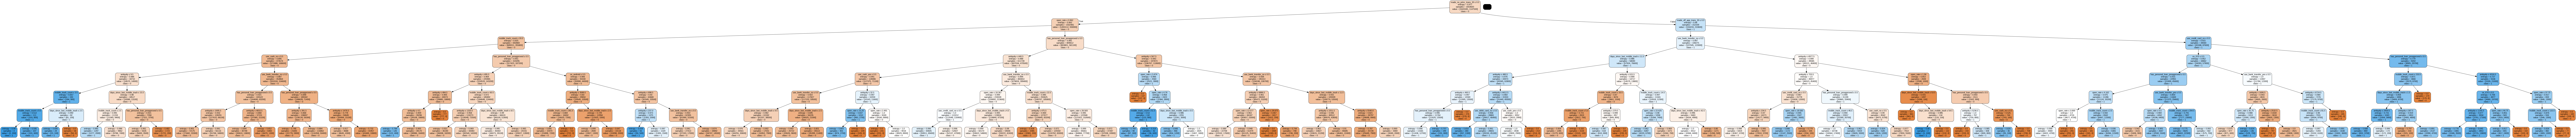

In [ ]:

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('conversion.png')
Image(graph.create_png())


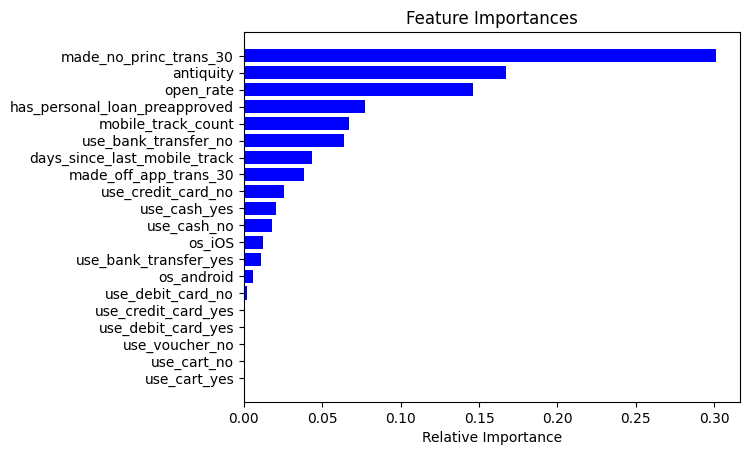

In [ ]:

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# **Model with top varables **

In [10]:
#data set with most important features
features_model=['made_no_princ_trans_30',
'antiquity',
'open_rate',
'has_personal_loan_preapproved',
'mobile_track_count',
'use_bank_transfer_no',
'days_since_last_mobile_track',
'made_off_app_trans_30',
'use_debit_card_no',
'use_cash_yes',
'use_cash_no',
'os_iOS',
'use_bank_transfer_yes',
'os_android',
'use_debit_card_no']


main_mod_X=X_data[features_model]



In [11]:
# Split dataset into training set and test set
#.sample(n=1000000,random_state=1)
#.sample(n=1000000,random_state=1)

#X_train, X_test, y_train, y_test = train_test_split(main_mod_X.sample(n=100000,random_state=1), y_data.sample(n=100000,random_state=1), test_size=0.3, random_state=1) # 70% training and 30% test


X_train, X_test, y_train, y_test = train_test_split(main_mod_X, y_data, test_size=0.3, random_state=1) # 70% training and 30% test


#** Data Saclling and Sampling Methods **

In [12]:
#scalling variables
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [13]:
#oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(trainX_scaled, y_train)

In [14]:
#undersampling

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(trainX_scaled, y_train)



# **NN clasifier**

In [ ]:

mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_res, y_res)

#mlp_clf.fit(trainX_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=300)

Cross validation

In [ ]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid_clf_auc = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5,scoring = 'roc_auc')
grid_clf_auc.fit(x_rus, y_rus) # X is train samples and y is the corresponding labels

print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Grid best parameter (max. AUC):  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
Grid best score (AUC):  0.6068286746313147


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)


In [ ]:

mlp_clf = MLPClassifier(hidden_layer_sizes=(20,),
                        alpha= 0.05,
                        max_iter = 300,
                        activation = 'relu',
                        learning_rate= 'constant',
                        solver = 'adam')



mlp_clf.fit(x_rus, y_rus)

#mlp_clf.fit(trainX_scaled, y_train)

y_pred = mlp_clf.predict(testX_scaled)


print('ROCAUC Score: {:.2f}'.format(metrics.roc_auc_score(y_test, y_pred)))
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROCAUC Score: 0.57
Accuracy: 0.61
F1 Score: 0.02


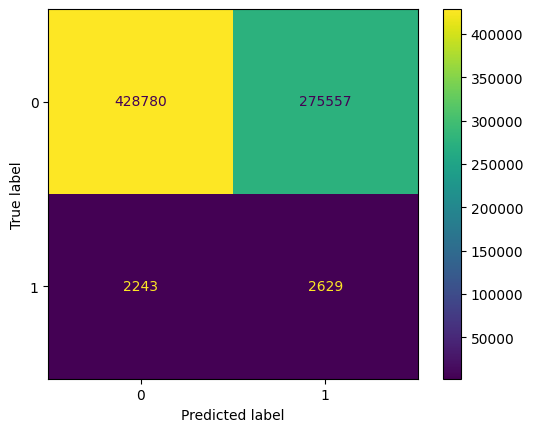

In [ ]:
predictions = mlp_clf.predict(testX_scaled)
cm = confusion_matrix(y_test, predictions, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp_clf.classes_)

disp.plot()

plt.show()

#**Logistic Regression**

In [ ]:
#scalling variables
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [ ]:
#oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(trainX_scaled, y_train)

In [ ]:
#undersampling

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(trainX_scaled, y_train)


In [ ]:
clf = LogisticRegression(C=1)

#clf.fit(X_res, y_res)  #oversampling

#clf.fit(x_rus, y_rus)  #undersampling

clf.fit(trainX_scaled, y_train) #non sampling

y_pred = clf.predict(testX_scaled)


print('ROCAUC Score: {:.2f}'.format(metrics.roc_auc_score(y_test, y_pred)))
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROCAUC Score: 0.50
Accuracy: 0.99
F1 Score: 0.00


LogisticRegression Grid search

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring = 'roc_auc')
logreg_cv.fit(X_res, y_res) #undersampling


print('Grid best parameter (max. AUC): ', logreg_cv.best_params_)
print('Grid best score (AUC): ', logreg_cv.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Grid best parameter (max. AUC):  {'C': 1000.0, 'penalty': 'l2'}
Grid best score (AUC):  0.6005703304861727


In [ ]:
clf = LogisticRegression(C=100.0, penalty= 'l2')

#clf.fit(X_res, y_res)  #oversampling

clf.fit(x_rus, y_rus)  #undersampling

#clf.fit(trainX_scaled, y_train) #non sampling

y_pred = clf.predict(testX_scaled)

print('ROCAUC Score: {:.2f}'.format(metrics.roc_auc_score(y_test, y_pred)))
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROCAUC Score: 0.57
Accuracy: 0.62
F1 Score: 0.02


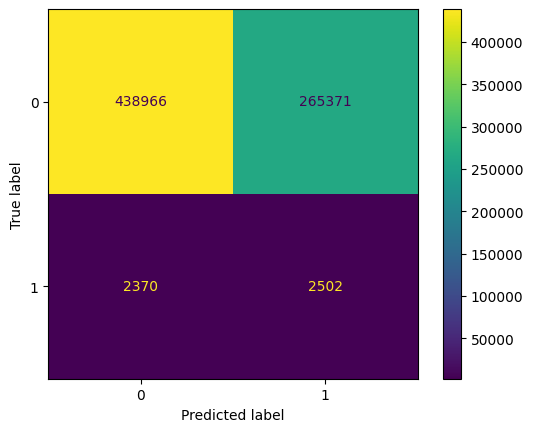

In [ ]:
predictions = y_pred
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

disp.plot()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay


# **SVM classifier**

In [15]:
x_rus.shape

(22950, 15)

In [ ]:

y_rus.groupby(['conversion'])['conversion'].count()

conversion
0    11475
1    11475
Name: conversion, dtype: int64

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}


svm_=svm.SVC()
svm_grid = GridSearchCV(svm_, param_grid, refit = True, verbose = 3, scoring = 'roc_auc')

# fitting the model for grid search
svm_grid.fit(x_rus, y_rus)

#y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)
print('Grid best parameter (max. AUC): ', svm_grid.best_params_)
print('Grid best score (AUC): ', svm_grid.best_score_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.575 total time=  33.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=  30.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.581 total time=  27.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.584 total time=  30.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=  30.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.584 total time=  26.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.607 total time=  30.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.593 total time=  29.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.597 total time=  27.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.611 total time=  29.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.583 total time=  25.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.601 total time=  28.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.589 total time=  28.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.593 total time=  26.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.604 total time=  30.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.586 total time=  26.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.599 total time=  29.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.586 total time=  29.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.589 total time=  26.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.601 total time=  29.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.584 total time=  26.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.600 total time=  28.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.586 total time=  29.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.588 total time=  26.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.595 total time=  30.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.569 total time=  31.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.589 total time=  28.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.578 total time=  30.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.582 total time=  31.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.591 total time=  31.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.588 total time=  27.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.606 total time=  29.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.593 total time=  28.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.600 total time=  27.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.611 total time=  30.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.583 total time=  25.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.600 total time=  28.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.593 total time=  28.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.596 total time=  26.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.608 total time=  29.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.586 total time=  25.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.598 total time=  29.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.588 total time=  26.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.593 total time=  27.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.603 total time=  28.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.586 total time=  26.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.599 total time=  29.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.586 total time=  25.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.590 total time=  29.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.601 total time=  27.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.560 total time=  55.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.575 total time=  53.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.557 total time=  53.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.565 total time=  54.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.568 total time=  52.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.585 total time=  32.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.599 total time=  33.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.588 total time=  33.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.590 total time=  33.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.603 total time=  32.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.583 total time=  27.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.600 total time=  30.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.593 total time=  27.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.598 total time=  28.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.612 total time=  30.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.585 total time=  25.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.601 total time=  29.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.592 total time=  27.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.596 total time=  27.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.606 total time=  28.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.587 total time=  26.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.596 total time=  29.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.586 total time=  26.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.592 total time=  28.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.602 total time=  28.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.551 total time= 2.2min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.558 total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.546 total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.557 total time= 2.2min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.559 total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.578 total time=  60.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.586 total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.582 total time=  57.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.580 total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.591 total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.583 total time=  34.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.604 total time=  34.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.593 total time=  34.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.600 total time=  35.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.616 total time=  35.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.585 total time=  28.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.600 total time=  28.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.593 total time=  30.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.597 total time=  28.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.608 total time=  28.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.586 total time=  29.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.598 total time=  25.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.592 total time=  29.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.595 total time=  28.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.605 total time=  27.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.543 total time=11.0min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.537 total time=11.5min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.528 total time=12.0min


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
param_grid = {'C': [100, 1000],
              'gamma': [ 0.001, 0.0001]}


svm_=svm.SVC(kernel='rbf')
svm_grid = GridSearchCV(svm_, param_grid, refit = True, verbose = 3, scoring = 'roc_auc')

# fitting the model for grid search
svm_grid.fit(x_rus, y_rus)

#y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)
print('Grid best parameter (max. AUC): ', svm_grid.best_params_)
print('Grid best score (AUC): ', svm_grid.best_score_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ................C=100, gamma=0.001;, score=0.585 total time=  37.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ................C=100, gamma=0.001;, score=0.600 total time=  23.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ................C=100, gamma=0.001;, score=0.593 total time=  25.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ................C=100, gamma=0.001;, score=0.597 total time=  23.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ................C=100, gamma=0.001;, score=0.608 total time=  26.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...............C=100, gamma=0.0001;, score=0.586 total time=  23.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...............C=100, gamma=0.0001;, score=0.598 total time=  25.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...............C=100, gamma=0.0001;, score=0.592 total time=  22.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...............C=100, gamma=0.0001;, score=0.595 total time=  25.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...............C=100, gamma=0.0001;, score=0.605 total time=  22.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.583 total time=  30.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.597 total time=  31.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.593 total time=  31.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.598 total time=  32.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.609 total time=  30.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..............C=1000, gamma=0.0001;, score=0.586 total time=  23.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..............C=1000, gamma=0.0001;, score=0.601 total time=  24.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..............C=1000, gamma=0.0001;, score=0.592 total time=  25.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..............C=1000, gamma=0.0001;, score=0.596 total time=  26.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..............C=1000, gamma=0.0001;, score=0.606 total time=  24.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Grid best parameter (max. AUC):  {'C': 100, 'gamma': 0.001}
Grid best score (AUC):  0.5966240904495422


In [17]:

#weights = {0:1.0, 1:100.0}
# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="rbf",C= 100, gamma= 0.001,class_weight='balanced')
wclf.fit(x_rus, y_rus) #undersampling
#wclf.fit(trainX_scaled, y_train) #non sampling
y_pred = wclf.predict(testX_scaled)

print('ROCAUC Score: {:.2f}'.format(metrics.roc_auc_score(y_test, y_pred)))
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROCAUC Score: 0.57
Accuracy: 0.68
F1 Score: 0.02


In [ ]:
X_res.shape

(709209, 20)

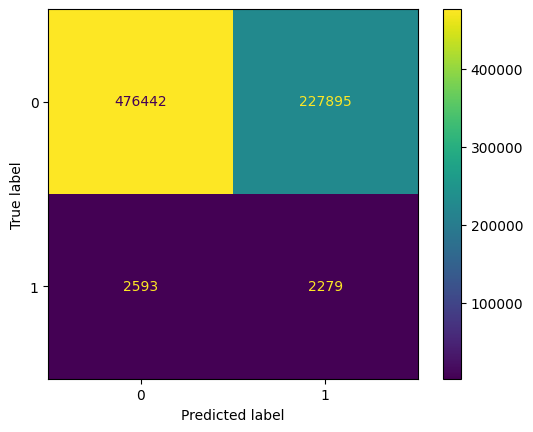

In [18]:
predictions = y_pred
cm = confusion_matrix(y_test, predictions, labels=wclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=wclf.classes_)

disp.plot()

plt.show()

In [ ]:

#weights = {0:1.0, 1:100.0}
# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="rbf",C= 100, gamma= 0.001,class_weight='balanced')

wclf.fit(trainX_scaled, y_train) #non sampling

y_pred = wclf.predict(testX_scaled)

print('ROCAUC Score: {:.2f}'.format(metrics.roc_auc_score(y_test, y_pred)))
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#** RandomForest + Gridsearch**

In [15]:


rfc = RandomForestClassifier(max_features = 15,n_estimators=10, random_state = 0)

# fit the predictor and target
rfc.fit(X_res, y_res)
#rfc_predict = rfc.predict(testX_scaled)
rfc_predict = rfc.predict(X_test)

#print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, rfc_predict)))
print('ROCAUC score: {:.2f}'.format(metrics.roc_auc_score(y_test, rfc_predict)))


<ipython-input-15-ba5edd48f983>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_res, y_res)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ROCAUC score: 0.52


In [ ]:
grid_values = {'max_features': [5, 8, 10, 12,15],
               'n_estimators': [25, 30, 35, 40,45]}


rfc = RandomForestClassifier(random_state = 0)
grid_clf_auc = GridSearchCV(rfc, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_res, y_res)

#y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Grid best parameter (max. AUC):  {'max_features': 5, 'n_estimators': 45}
Grid best score (AUC):  0.9984395684867564


In [ ]:
grid_values = {#'max_features': [5, 7, 8, 9],
               'n_estimators': [25, 30, 35, 40,45,50,55]}


rfc = RandomForestClassifier(max_features=5,random_state = 0)
grid_clf_auc = GridSearchCV(rfc, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_res, y_res)
#y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [16]:

rfc = RandomForestClassifier(max_features = 5,n_estimators=45, random_state = 0)

# fit the predictor and target
rfc.fit(X_res, y_res)
#rfc_predict = rfc.predict(testX_scaled)
rfc_predict = rfc.predict(testX_scaled)

#print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, rfc_predict)))
print('ROCAUC score: {:.2f}'.format(metrics.roc_auc_score(y_test, rfc_predict)))
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, y_pred)))


<ipython-input-16-fe9138200712>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_res, y_res)


ROCAUC score: 0.50


In [ ]:
X_train.shape

(70000, 15)

# **Other Algorithm tested **

GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
rfc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1

# fit the predictor and target
rfc.fit(X_res, y_res)
rfc_predict = rfc.predict(testX_scaled)

#print('F1 Score: {:.2f}'.format(metrics.f1_score(y_test, rfc_predict)))
print('ROCAUC score: {:.2f}'.format(metrics.roc_auc_score(y_test, rfc_predict)))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROCAUC score: 0.52
